We visualize the imbalanced classes used to show volume does not monotonically decrease here.

## Imports

In [1]:
# Standard library
import os
import sys

# Third-party
import matplotlib.pyplot as plt
import numpy as np
import torch

# Local package imports
from minima_volume.dataset_funcs import (
    prepare_datasets,
    save_dataset,
    save_model,
    prepare_class_imbalanced_dataset,
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Input Parameters

In [2]:

# ==============================
# Base Input Parameters
# ==============================
# --- SEEDS ---
data_seed = 10            
model_seed = 0           

# --- Training configuration ---
epochs = 500            

# --- Dataset configuration ---
base_data_size = 1500      
dataset_type = "data"   
dataset_quantities = [0, 2000 - 1500, 3000 - 1500, 6000 - 1500, 10000 - 1500]

# --- Output configuration ---
base_output_dir = ""     
save_generated_dataset = True   
save_generated_models = True    


## Model + Dataset Specific Code

Need generation.

In [3]:
# User specifies the model module name
from minima_volume.models import MNIST_model_data as model_module

# Generate dataset
x_base, y_base, x_test, y_test = model_module.get_dataset(
    device = device
)

## Dataset Generation

Here, we generate the datasets and visualize their resulting distribution.

In [4]:
# ===================================
# Dataset Logic
# ===================================
# Prepare datasets once
x_base_train, y_base_train, x_additional, y_additional = prepare_class_imbalanced_dataset(
    x_base=x_base,
    y_base=y_base,
    target_labels=[0],
    dataset_quantities=dataset_quantities,
    base_data_size=base_data_size,
    target_ratio=0.9,
    data_seed=data_seed,
    seed_1=None,
    base_imbalanced=False,
    additional_imbalanced=True,
)

# Move to device if needed
x_base_train = x_base_train.to(device)
y_base_train = y_base_train.to(device)
x_additional = x_additional.to(device)
y_additional = y_additional.to(device)

# Identify smallest and largest datasets
min_additional = min(dataset_quantities)
max_additional = max(dataset_quantities)

# Construct the datasets
y_small = torch.cat([y_base_train, y_additional[:min_additional]], dim=0)
y_large = torch.cat([y_base_train, y_additional[:max_additional]], dim=0)

Epoch 100/500: Train Loss 0.0041 | Test Loss 0.4685 | accs Train 1.0000 Test 0.9004


Epoch 200/500: Train Loss 0.0009 | Test Loss 0.5357 | accs Train 1.0000 Test 0.9002


Epoch 300/500: Train Loss 0.0004 | Test Loss 0.5749 | accs Train 1.0000 Test 0.8996


Epoch 400/500: Train Loss 0.0002 | Test Loss 0.6024 | accs Train 1.0000 Test 0.8998


Epoch 500/500: Train Loss 0.0001 | Test Loss 0.6235 | accs Train 1.0000 Test 0.8997
Completed training with 0 additional samples of data
Epoch 1/500: Train Loss 2.3210 | Test Loss 2.2079 | accs Train 0.0620 Test 0.1922


Epoch 100/500: Train Loss 0.0070 | Test Loss 0.4139 | accs Train 1.0000 Test 0.9073


Epoch 200/500: Train Loss 0.0012 | Test Loss 0.4715 | accs Train 1.0000 Test 0.9090


Epoch 300/500: Train Loss 0.0005 | Test Loss 0.5008 | accs Train 1.0000 Test 0.9100


Epoch 400/500: Train Loss 0.0003 | Test Loss 0.5208 | accs Train 1.0000 Test 0.9102


Epoch 500/500: Train Loss 0.0002 | Test Loss 0.5360 | accs Train 1.0000 Test 0.9106
Completed training with 500 additional samples of data
Epoch 1/500: Train Loss 2.3278 | Test Loss 2.2376 | accs Train 0.0493 Test 0.1033


Epoch 100/500: Train Loss 0.0138 | Test Loss 0.3549 | accs Train 1.0000 Test 0.9105


Epoch 200/500: Train Loss 0.0016 | Test Loss 0.4127 | accs Train 1.0000 Test 0.9157


Epoch 300/500: Train Loss 0.0006 | Test Loss 0.4410 | accs Train 1.0000 Test 0.9166


Epoch 400/500: Train Loss 0.0004 | Test Loss 0.4601 | accs Train 1.0000 Test 0.9177


Epoch 500/500: Train Loss 0.0002 | Test Loss 0.4753 | accs Train 1.0000 Test 0.9184
Completed training with 1500 additional samples of data
Epoch 1/500: Train Loss 2.3355 | Test Loss 2.2584 | accs Train 0.0380 Test 0.0999


Epoch 100/500: Train Loss 0.0349 | Test Loss 0.2982 | accs Train 0.9937 Test 0.9171


Epoch 200/500: Train Loss 0.0026 | Test Loss 0.3501 | accs Train 1.0000 Test 0.9228


Epoch 300/500: Train Loss 0.0009 | Test Loss 0.3834 | accs Train 1.0000 Test 0.9235


Epoch 400/500: Train Loss 0.0004 | Test Loss 0.4052 | accs Train 1.0000 Test 0.9242


Epoch 500/500: Train Loss 0.0003 | Test Loss 0.4214 | accs Train 1.0000 Test 0.9239
Completed training with 4500 additional samples of data
Epoch 1/500: Train Loss 2.3391 | Test Loss 2.2653 | accs Train 0.0335 Test 0.0989


Epoch 100/500: Train Loss 0.0599 | Test Loss 0.2661 | accs Train 0.9840 Test 0.9239


Epoch 200/500: Train Loss 0.0050 | Test Loss 0.2782 | accs Train 1.0000 Test 0.9337


Epoch 300/500: Train Loss 0.0013 | Test Loss 0.3113 | accs Train 1.0000 Test 0.9353


Epoch 400/500: Train Loss 0.0006 | Test Loss 0.3327 | accs Train 1.0000 Test 0.9352


Epoch 500/500: Train Loss 0.0003 | Test Loss 0.3485 | accs Train 1.0000 Test 0.9358
Completed training with 8500 additional samples of data


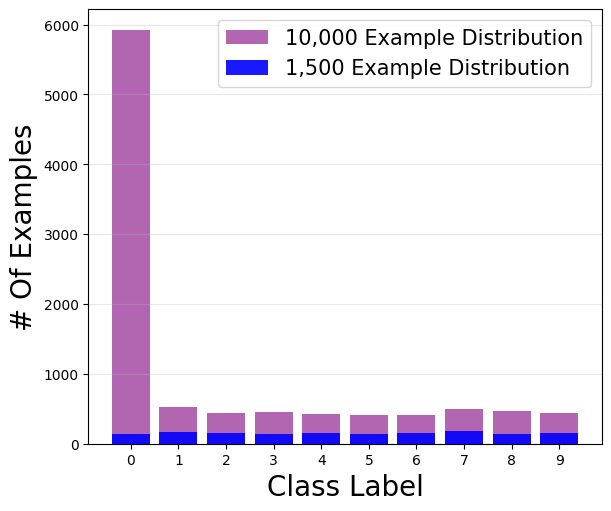

✅ Figure saved to: .\class_distribution.png

=== Label Distribution Comparison ===
Total samples (smallest): 1500
Total samples (largest): 10000

Class 0: small=134 (8.9%), large=5923 (59.2%)
Class 1: small=173 (11.5%), large=519 (5.2%)
Class 2: small=152 (10.1%), large=445 (4.5%)
Class 3: small=136 (9.1%), large=453 (4.5%)
Class 4: small=153 (10.2%), large=421 (4.2%)
Class 5: small=136 (9.1%), large=416 (4.2%)
Class 6: small=151 (10.1%), large=417 (4.2%)
Class 7: small=180 (12.0%), large=500 (5.0%)
Class 8: small=134 (8.9%), large=466 (4.7%)
Class 9: small=151 (10.1%), large=440 (4.4%)


In [10]:
def plot_label_distribution_comparison(y_small, y_large, output_dir=".", filename="class_distribution.png"):
    # Convert tensors to numpy
    y_small = y_small.cpu().numpy() if y_small.is_cuda else y_small.numpy()
    y_large = y_large.cpu().numpy() if y_large.is_cuda else y_large.numpy()

    # Compute label counts
    unique_labels = np.unique(np.concatenate([y_small, y_large]))
    counts_small = np.array([np.sum(y_small == lbl) for lbl in unique_labels])
    counts_large = np.array([np.sum(y_large == lbl) for lbl in unique_labels])

    # Create plot
    plt.figure(figsize=(6, 5), constrained_layout=True)
    bar_width = 0.8

    plt.bar(unique_labels, counts_large, color='purple', alpha=0.6, width=bar_width,
            label=f"{len(y_large):,} Example Distribution")
    plt.bar(unique_labels, counts_small, color='blue', alpha=0.9, width=bar_width,
            label=f"{len(y_small):,} Example Distribution")

    plt.xlabel("Class Label", fontsize=20)
    plt.ylabel("# Of Examples", fontsize=20)
    plt.xticks(unique_labels)
    plt.grid(True, alpha=0.3, axis='y')
    plt.legend(fontsize=15)

    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)
    save_path = os.path.join(output_dir, filename)

    # Save and show
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()

    print(f"✅ Figure saved to: {save_path}")

    # Print textual summary
    print("\n=== Label Distribution Comparison ===")
    print(f"Total samples (smallest): {len(y_small)}")
    print(f"Total samples (largest): {len(y_large)}\n")
    for lbl, c_small, c_large in zip(unique_labels, counts_small, counts_large):
        pct_small = 100 * c_small / len(y_small)
        pct_large = 100 * c_large / len(y_large)
        print(f"Class {lbl}: small={c_small} ({pct_small:.1f}%), large={c_large} ({pct_large:.1f}%)")

# Example call
plot_label_distribution_comparison(y_small, y_large, output_dir=".", filename="class_distribution.png")